In [ ]:
# Prepare the environment
import gget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
from numpy.lib.npyio import savez

gget.setup("cellxgene")

# Uncomment the following line to see the documentation
# help(gget.cellxgene)

'''
Query the cellxgene database for the genes of interest
Filters:
Genes: C1QA, C1QC, C1QB, FCN3, CFH, CD55, CR1, CD46, C1D, CFI, C7, C2, CFP, VCP, C5, FCN2, FCN1, CD59, C1S, C1R, C3AR1, C1QBP, CFD, C3, C5AR1, C5AR2, C6, C9, CR2, C4B, CFB, C4A
disease: normal
tissue_general: kidney

> Query Time: 3m 30s
'''

adata = gget.cellxgene(
    ensembl=True,
    verbose=True,
    gene=["ENSG00000173372", "ENSG00000159189", "ENSG00000173369", "ENSG00000000971", "ENSG00000196352", "ENSG00000203710", "ENSG00000117335", "ENSG00000197223", "ENSG00000205403", "ENSG00000112936", "ENSG00000166278", "ENSG00000126759", "ENSG00000106804", "ENSG00000085063", "ENSG00000182326", "ENSG00000159403", "ENSG00000171860", "ENSG00000108561", "ENSG00000197766", "ENSG00000125730", "ENSG00000197405", "ENSG00000134830", "ENSG00000039537", "ENSG00000113600", "ENSG00000117322", "ENSG00000224389", "ENSG00000243649", "ENSG00000244731"],
    disease='normal',
    tissue_general='kidney',
)

all_genes = {
"""
Dictionary mapping gene names to their corresponding Ensembl IDs.

Keys:
    str: Gene names (e.g., 'C1D', 'C1QA', etc.)
Values:
    str: Ensembl IDs (e.g., 'ENSG00000197223', 'ENSG00000173372', etc.)
"""
    'C1D': 'ENSG00000197223',
    'C1QA': 'ENSG00000173372',
    'C1QB': 'ENSG00000173369',
    'C1QBP': 'ENSG00000108561',
    'C1QC': 'ENSG00000159189',
    'C1R': 'ENSG00000159403',
    'C1S': 'ENSG00000182326',
    'C2': 'ENSG00000166278',
    'C3': 'ENSG00000125730',
    'C3AR1': 'ENSG00000171860',
    'C4A': 'ENSG00000244731',
    'C4B': 'ENSG00000224389',
    'C5': 'ENSG00000106804',
    'C5AR1': 'ENSG00000197405',
    'C5AR2': 'ENSG00000134830',
    'C6': 'ENSG00000039537',
    'C7': 'ENSG00000112936',
    'C9': 'ENSG00000113600',
    'CD46': 'ENSG00000117335',
    'CD55': 'ENSG00000196352',
    'CD59': 'ENSG00000085063',
    'CFB': 'ENSG00000243649',
    'CFD': 'ENSG00000197766',
    'CFH': 'ENSG00000000971',
    'CFI': 'ENSG00000205403',
    'CFP': 'ENSG00000126759',
    'CR1': 'ENSG00000203710',
    'CR2': 'ENSG00000117322',
    'FCN1': 'ENSG00000085265',
    'FCN2': 'ENSG00000160339',
    'FCN3': 'ENSG00000142748',
    'VCP': 'ENSG00000165280'
}

subset_genes = {
"""
Dictionary mapping a subset of gene names to their corresponding Ensembl IDs.

Keys:
   str: Gene names (e.g., 'C3', 'C3AR1', etc.)

Values:
   str: Ensembl IDs (e.g., 'ENSG00000125730', 'ENSG00000171860', etc.)
"""
    "C3": "ENSG00000125730",
    "C3AR1": "ENSG00000171860",
    "C5": "ENSG00000106804",
    "C5AR1": "ENSG00000197405",
    "C5AR2": "ENSG00000134830",
    "CFH": "ENSG00000000971",
}


"""
Preprocess the kidney dataset by filtering genes, normalizing counts,
log-transforming the data, and scaling the data. Then, perform PCA
and plot an overview of the PCA results.

Steps:
1. Filter genes with at least 1 count.
2. Normalize the total counts to 1e6.
3. Log-transform the data.
4. Scale the data.
5. Perform PCA.
6. Plot an overview of the PCA results.
"""

adata.write_h5ad(
    filename="/Volumes/CHAMPANERI/Databases/Human_Census_KidneyData.h5ad",
)

sc.pp.filter_genes(adata, min_counts=1)
sc.pp.normalize_total(adata, target_sum=1e6)
sc.pp.log1p(adata)
sc.pp.scale(adata)

sc.tl.pca(adata)
sc.pl.pca_overview(adata)

adata.write_h5ad(
    filename="/Volumes/CHAMPANERI/Databases/Human_Census_KidneyData_PP.h5ad",
)

In [4]:
# Prepare the environment
import gget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc

# RUN THIS CELL TO LOAD THE DATA
adata = sc.read_h5ad("/Volumes/CHAMPANERI/Databases/Human_Census_KidneyData_PP.h5ad")
print(adata.varm_keys)

# Check if feature_id exists and contains unique values
if 'feature_id' in adata.var.columns and not adata.var['feature_id'].duplicated().any():
    adata.var_names = adata.var['feature_id']
print(adata.var_names)

<bound method AnnData.varm_keys of AnnData object with n_obs × n_vars = 597379 × 28
    obs: 'dataset_id', 'assay', 'suspension_type', 'sex', 'tissue_general', 'tissue', 'cell_type', 'is_primary_data', 'disease'
    var: 'soma_joinid', 'feature_id', 'feature_name', 'feature_type', 'feature_length', 'nnz', 'n_measured_obs', 'n_counts', 'mean', 'std'
    uns: 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'>
Index(['ENSG00000173372', 'ENSG00000159189', 'ENSG00000173369',
       'ENSG00000000971', 'ENSG00000196352', 'ENSG00000203710',
       'ENSG00000117335', 'ENSG00000197223', 'ENSG00000205403',
       'ENSG00000112936', 'ENSG00000166278', 'ENSG00000126759',
       'ENSG00000106804', 'ENSG00000085063', 'ENSG00000182326',
       'ENSG00000159403', 'ENSG00000171860', 'ENSG00000108561',
       'ENSG00000197766', 'ENSG00000125730', 'ENSG00000197405',
       'ENSG00000134830', 'ENSG00000039537', 'ENSG00000113600',
       'ENSG00000117322', 'ENSG00000224389', 'ENSG00000243649',
       'ENSG00

In [5]:
""""
Dictionary mapping gene names to their corresponding Ensembl IDs.

Keys:
    str: Gene names (e.g., 'C1D', 'C1QA', etc.)
Values:
    str: Ensembl IDs (e.g., 'ENSG00000197223', 'ENSG00000173372', etc.)
"""
all_genes = {
    'ENSG00000173372': 'C1QA',
    'ENSG00000159189': 'C1QC',
    'ENSG00000173369': 'C1QB',
    'ENSG00000000971': 'CFH',
    'ENSG00000196352': 'CD55',
    'ENSG00000203710': 'CR1',
    'ENSG00000117335': 'CD46',
    'ENSG00000197223': 'C1D',
    'ENSG00000205403': 'CFI',
    'ENSG00000112936': 'C7',
    'ENSG00000166278': 'C2',
    'ENSG00000126759': 'CFP',
    'ENSG00000106804': 'C5',
    'ENSG00000085063': 'VCP',
    'ENSG00000182326': 'C1S',
    'ENSG00000159403': 'C1R',
    'ENSG00000171860': 'C3AR1',
    'ENSG00000108561': 'C1QBP',
    'ENSG00000197766': 'CFD',
    'ENSG00000125730': 'C3',
    'ENSG00000197405': 'C5AR1',
    'ENSG00000134830': 'C5AR2',
    'ENSG00000039537': 'C6',
    'ENSG00000113600': 'C9',
    'ENSG00000117322': 'CR2',
    'ENSG00000224389': 'C4B',
    'ENSG00000243649': 'CFB',
    'ENSG00000244731': 'C4A',
    'ENSG00000085265': 'FCN1',
    'ENSG00000160339': 'FCN2',
    'ENSG00000142748': 'FCN3',
    'ENSG00000165280': 'VCP'
}
"""
Dictionary mapping a subset of gene names to their corresponding Ensembl IDs.

Keys:
   str: Gene names (e.g., 'C3', 'C3AR1', etc.)

Values:
   str: Ensembl IDs (e.g., 'ENSG00000125730', 'ENSG00000171860', etc.)
"""
subset_genes = {
    'ENSG00000125730': 'C3',
    'ENSG00000171860': 'C3AR1',
    'ENSG00000106804': 'C5',
    'ENSG00000197405': 'C5AR1',
    'ENSG00000134830': 'C5AR2',
    'ENSG00000000971': 'CFH',
}

In [ ]:
# Check if cell_type annotation exists
if 'cell_type' not in adata.obs.columns:
    print("No cell_type annotation found in adata.obs")
    print("Available annotations:", adata.obs.columns)
else:
    # Calculate mean expression of our genes per cell type
    # First verify that the gene IDs are in the dataset
    valid_genes = [gene for gene in adata.var_names if gene in adata.var_names]
    print(f"Found {len(valid_genes)} genes out of 28")

    # Group by cell type and calculate mean expression
    cell_type_expression = pd.DataFrame()
    for cell_type in adata.obs['cell_type'].unique():
        # Get indices for this cell type
        cells_idx = adata.obs['cell_type'] == cell_type
        # Calculate mean expression across these cells for each gene
        mean_expr = adata[cells_idx, valid_genes].X.mean(axis=0)
        # Sum the expression across all genes
        total_expr = np.sum(mean_expr)
        cell_type_expression.loc[cell_type, 'total_expression'] = total_expr

    # Sort by total expression and get top 50
    top_50_cell_types = cell_type_expression.sort_values('total_expression', ascending=False).head(50)

    print("Top 50 cell types with highest gene expression:")
    print(top_50_cell_types)

    # Filter the AnnData object to include only cells from these top 50 cell types
    top_50_cells = adata.obs['cell_type'].isin(top_50_cell_types.index)
    filtered_adata = adata[top_50_cells, :]

    # Verify the filtering
    print(f"Original number of cells: {adata.n_obs}")
    print(f"Number of cells in top 50 cell types: {filtered_adata.n_obs}")

/var/folders/dk/j41qmgy16b5_49s_wh137t_m0000gn/T/ipykernel_19676/636196150.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_expression = filtered_adata.to_df().groupby(filtered_adata.obs['cell_type']).mean()


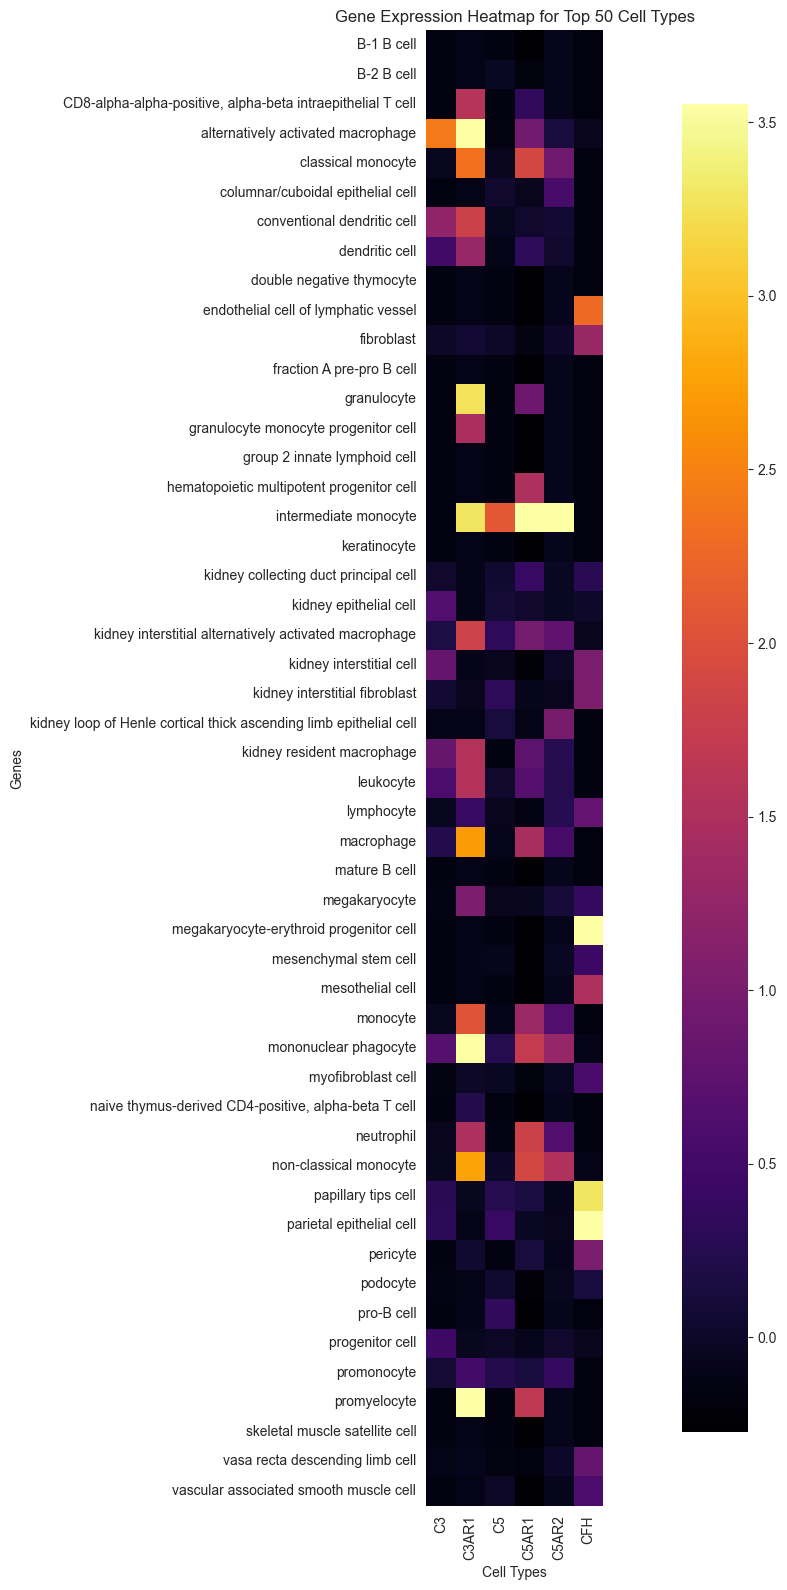

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the expression data for the top 50 cell types
top_50_cell_types = cell_type_expression.sort_values('total_expression', ascending=False).head(50)
top_50_cells = adata.obs['cell_type'].isin(top_50_cell_types.index)
filtered_adata = adata[top_50_cells, :]

# Calculate mean expression of each gene for the top 50 cell types
mean_expression = filtered_adata.to_df().groupby(filtered_adata.obs['cell_type']).mean()

# Create a completely new clean dictionary for gene mapping
all_genes = {
    'ENSG00000173372': 'C1QA',
    'ENSG00000159189': 'C1QC',
    'ENSG00000173369': 'C1QB',
    'ENSG00000000971': 'CFH',
    'ENSG00000196352': 'CD55',
    'ENSG00000203710': 'CR1',
    'ENSG00000117335': 'CD46',
    'ENSG00000197223': 'C1D',
    'ENSG00000205403': 'CFI',
    'ENSG00000112936': 'C7',
    'ENSG00000166278': 'C2',
    'ENSG00000126759': 'CFP',
    'ENSG00000106804': 'C5',
    'ENSG00000085063': 'VCP',
    'ENSG00000182326': 'C1S',
    'ENSG00000159403': 'C1R',
    'ENSG00000171860': 'C3AR1',
    'ENSG00000108561': 'C1QBP',
    'ENSG00000197766': 'CFD',
    'ENSG00000125730': 'C3',
    'ENSG00000197405': 'C5AR1',
    'ENSG00000134830': 'C5AR2',
    'ENSG00000039537': 'C6',
    'ENSG00000113600': 'C9',
    'ENSG00000117322': 'CR2',
    'ENSG00000224389': 'C4B',
    'ENSG00000243649': 'CFB',
    'ENSG00000244731': 'C4A',
    'ENSG00000085265': 'FCN1',
    'ENSG00000160339': 'FCN2',
    'ENSG00000142748': 'FCN3',
    'ENSG00000165280': 'VCP'
}

subset_genes = {
    'ENSG00000125730': 'C3',
    'ENSG00000171860': 'C3AR1',
    'ENSG00000106804': 'C5',
    'ENSG00000197405': 'C5AR1',
    'ENSG00000134830': 'C5AR2',
    'ENSG00000000971': 'CFH',
}

# Rename the columns from Ensembl IDs to gene names
mean_expression.columns = [all_genes.get(col, col) for col in mean_expression.columns]

# Filter the mean expression data to only include the subset of genes
mean_expression = mean_expression[subset_genes.values()]

# Create a heatmap with transposed data
plt.figure(figsize=(16, 16))
sns.heatmap(mean_expression, cmap='inferno', xticklabels=True, yticklabels=True, square=True, annot=False, robust=True, cbar_kws={"shrink":0.9})
plt.title('Gene Expression Heatmap for Top 50 Cell Types')
plt.xlabel('Cell Types')
plt.ylabel('Genes')
plt.tight_layout()
plt.savefig('Human_census_test.png')

In [ ]:
import scanpy as sc
import matplotlib.pyplot as plt

# Extract the expression data for the top 50 cell types
top_50_cell_types = cell_type_expression.sort_values('total_expression', ascending=False).head(10)
top_50_cells = adata.obs['cell_type'].isin(top_50_cell_types.index)
filtered_adata = adata[top_50_cells, :]

# Create a clean mapping dictionary
all_genes = {
    'C1D': 'ENSG00000197223',
    'C1QA': 'ENSG00000173372',
    'C1QB': 'ENSG00000173369',
    'C1QBP': 'ENSG00000108561',
    'C1QC': 'ENSG00000159189',
    'C1R': 'ENSG00000159403',
    'C1S': 'ENSG00000182326',
    'C2': 'ENSG00000166278',
    'C3': 'ENSG00000125730',
    'C3AR1': 'ENSG00000171860',
    'C4A': 'ENSG00000244731',
    'C4B': 'ENSG00000224389',
    'C5': 'ENSG00000106804',
    'C5AR1': 'ENSG00000197405',
    'C5AR2': 'ENSG00000134830',
    'C6': 'ENSG00000039537',
    'C7': 'ENSG00000112936',
    'C9': 'ENSG00000113600',
    'CD46': 'ENSG00000117335',
    'CD55': 'ENSG00000196352',
    'CD59': 'ENSG00000085063',
    'CFB': 'ENSG00000243649',
    'CFD': 'ENSG00000197766',
    'CFH': 'ENSG00000000971',
    'CFI': 'ENSG00000205403',
    'CFP': 'ENSG00000126759',
    'CR1': 'ENSG00000203710',
    'CR2': 'ENSG00000117322',
    # 'FCN1': 'ENSG00000085265',
    # 'FCN2': 'ENSG00000160339',
    # 'FCN3': 'ENSG00000142748',
    # 'VCP': 'ENSG00000165280'
}

# # Create a list of genes we want to display (var_names)
# gene_list = list(ensembl_to_gene.keys())
#
# # Create a temporary dictionary to map gene IDs to display names
# gene_symbols = {gene_id: symbol for gene_id, symbol in ensembl_to_gene.items()}

# Set up the figure size
plt.figure(figsize=(16, 12))

# Create the heatmap using scanpy
sc.pl.heatmap(filtered_adata,
              all_genes,  # Genes to include
              groupby='cell_type',   # Group by cell type
              use_raw=False,         # Use processed data
              swap_axes=True,        # Swap axes to match previous orientation
              show_gene_labels=True, # Show gene labels
              # gene_symbols=all_genes, # Use gene symbols instead of IDs
              figsize=(16, 12),      # Figure size
              # cmap='viridis',        # Color map
              dendrogram=True)      # No dendrogram

# Tight layout and display
plt.tight_layout()
plt.show()

Found 28 out of 32 genes in the dataset


<Figure size 2000x2000 with 0 Axes>

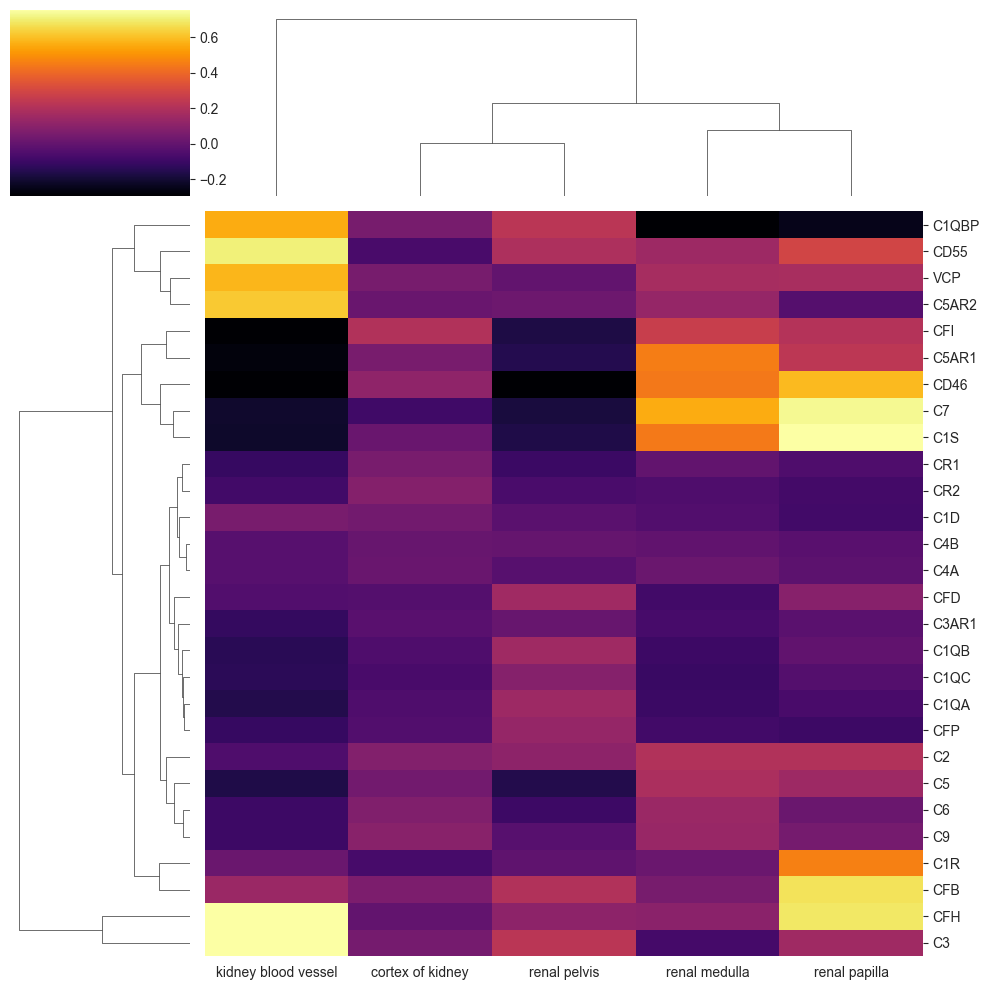

In [183]:

# Calculate mean expression of our genes per tissue
valid_genes = [gene for gene in all_genes.keys() if gene in adata.var_names]
print(f"Found {len(valid_genes)} out of {len(all_genes)} genes in the dataset")

# Initialize DataFrame with proper structure
tissue_types = adata.obs['tissue'].unique()
tissue_expression = pd.DataFrame(index=tissue_types, columns=valid_genes)

for tissue_type in tissue_types:
    # Get indices for this tissue
    cells_idx = adata.obs['tissue'] == tissue_type
    # Calculate mean expression across these cells for each gene
    subset = adata[cells_idx, valid_genes]

    # Handle sparse matrices if needed
    import scipy.sparse
    if scipy.sparse.issparse(subset.X):
        mean_expr = subset.X.mean(axis=0).A1  # Convert to 1D array
    else:
        mean_expr = np.array(subset.X.mean(axis=0))

    # Fill in the values explicitly
    for i, gene in enumerate(valid_genes):
        tissue_expression.loc[tissue_type, gene] = float(mean_expr[i])

# Convert all values to numeric and fill NAs
tissue_expression = tissue_expression.apply(pd.to_numeric, errors='coerce')
tissue_expression = tissue_expression.fillna(0)

# Rename columns from Ensembl IDs to gene names
tissue_expression.columns = [all_genes.get(col, col) for col in tissue_expression.columns]

# Filter the tissues to remove the kidney data
tissue_expression = tissue_expression.drop('kidney')

# # Filter the mean expression data to only include the subset of genes
# tissue_expression = tissue_expression[subset_genes.values()]

# Create a heatmap
plt.figure(figsize=(20, 20))
sns.clustermap(tissue_expression.T, cmap='inferno', xticklabels=True, yticklabels=True, square=True, annot=False, robust=True)
plt.tight_layout()
plt.savefig('Human_census_test.png')